In [2]:
import collections
from tqdm import tqdm
import statistics
import os
import copy
import math
import numpy as np
import csv
import matplotlib.pyplot as plt

In [4]:
rows = []

anime_id_to_name = {}
anime_name_to_id = {}
anime_id_to_genres = {}

with open('../anime.csv', newline='') as f:
    file_rows = csv.reader(f)
    first_row = True
    for row in file_rows:
        if first_row:
            first_row = False
        else:
            anime_id = int(row[0])
            anime_name = row[1]
            anime_genres = set()
            anime_genres_spaces = row[2].split(',')
            for genre in anime_genres_spaces:
                if not genre:
                    continue
                if genre[0] == ' ':
                    anime_genres.add(genre[1:])
                else:
                    anime_genres.add(genre)
                
            
            
            anime_id_to_name[anime_id] = anime_name
            anime_name_to_id[anime_name] = anime_id
            anime_id_to_genres[anime_id] = anime_genres   
            
anime_names = anime_name_to_id.keys()
anime_ids = anime_id_to_name.keys()

In [5]:
print(anime_id_to_name[list(anime_id_to_genres.keys())[618]],list(anime_id_to_genres.items())[618])

Zan Sayonara Zetsubou Sensei Bangaichi (7044, {'Comedy', 'School', 'Parody'})


In [6]:
all_genres_counter = collections.Counter([genre for anime_genres in anime_id_to_genres.values() for genre in anime_genres])

all_genres = set()
for s in anime_id_to_genres.values():
    all_genres |= s
    
anime_count = len(list(anime_ids))

In [7]:
print(all_genres_counter)

print()

print(all_genres)

print()

print(anime_count)

Counter({'Comedy': 4645, 'Action': 2845, 'Adventure': 2348, 'Fantasy': 2309, 'Sci-Fi': 2070, 'Drama': 2016, 'Shounen': 1711, 'Kids': 1609, 'Romance': 1464, 'School': 1220, 'Slice of Life': 1220, 'Hentai': 1141, 'Supernatural': 1037, 'Mecha': 944, 'Music': 860, 'Historical': 806, 'Magic': 778, 'Ecchi': 637, 'Shoujo': 603, 'Seinen': 547, 'Sports': 543, 'Mystery': 495, 'Super Power': 465, 'Military': 426, 'Parody': 408, 'Space': 381, 'Horror': 369, 'Harem': 317, 'Demons': 294, 'Martial Arts': 265, 'Dementia': 240, 'Psychological': 229, 'Police': 197, 'Game': 181, 'Samurai': 148, 'Vampire': 102, 'Thriller': 87, 'Cars': 72, 'Shounen Ai': 65, 'Shoujo Ai': 55, 'Josei': 54, 'Yuri': 42, 'Yaoi': 39})

{'Vampire', 'Sci-Fi', 'Magic', 'Shounen Ai', 'Action', 'Space', 'Shoujo Ai', 'School', 'Dementia', 'Martial Arts', 'Seinen', 'Slice of Life', 'Police', 'Yaoi', 'Yuri', 'Mystery', 'Adventure', 'Game', 'Mecha', 'Ecchi', 'Demons', 'Harem', 'Shounen', 'Cars', 'Super Power', 'Samurai', 'Military', 'Hist

In [8]:
def calculate_tfidf(anime):
    terms = list(anime_id_to_genres[anime])
    terms_len = len(terms)
    
    tfidfd = collections.defaultdict(lambda: 0.0)

    for genre in anime_id_to_genres[anime]:
        tfidfd[genre] = 1.0/terms_len * np.log10(anime_count/all_genres_counter[genre])

    ksum = sum(tfidfd[k] for k in tfidfd.keys())
    for k in tfidfd.keys():
        tfidfd[k] = tfidfd[k]/ksum
        
    return tfidfd

calculate_tfidf(7044)

defaultdict(<function __main__.calculate_tfidf.<locals>.<lambda>()>,
            {'Comedy': 0.145506621494283,
             'School': 0.34537275392030353,
             'Parody': 0.5091206245854135})

In [9]:
def calculate_cosine(anime1, anime2):
        
    # this is done so that a title is similar to itself even if it doesnt have any tags
    if anime1 == anime2:
        return 1
    
    anime1tfidf = calculate_tfidf(anime1)
    anime2tfidf = calculate_tfidf(anime2)
    
    licznik = 0.0
    for k in set(list(anime1tfidf.keys()) + list(anime2tfidf.keys())):
        licznik += anime1tfidf[k] * anime2tfidf[k]
    
    m1 = sum(anime1tfidf[k]**2.0 for k in anime1tfidf.keys())
    m2 = sum(anime2tfidf[k]**2.0 for k in anime2tfidf.keys())
    
    try:
        res = licznik/(math.sqrt(m1) * math.sqrt(m2))
        if not math.isnan(res):
            return res
        else:
            return -1
    except:
        return -1

In [10]:
atmp = []
for anime in anime_ids:
    atmp.append(( 
        calculate_cosine(
            anime, 
            6675
        ), anime,anime_id_to_name[anime],anime_id_to_genres[anime])
    )
    
for e in sorted(atmp, reverse=True):
    print(e)

<ipython-input-9-9aaea3070c22>:18: RuntimeWarning: invalid value encountered in double_scalars
  res = licznik/(math.sqrt(m1) * math.sqrt(m2))


(1, 6675, 'Redline', {'Cars', 'Action', 'Sci-Fi', 'Sports'})
(0.9337097588024856, 11483, 'Redline Pilot', {'Cars', 'Sports'})
(0.9156056881079427, 10562, 'Machine Hayabusa', {'Cars', 'Action', 'Shounen', 'Sports'})
(0.8941622712299346, 3800, 'Arrow Emblem Grand Prix no Taka', {'Cars', 'Drama', 'Sports'})
(0.8872122881978289, 20115, 'Gekisou! Rubenkaiser', {'Cars', 'Shounen', 'Sports'})
(0.8872122881978289, 7048, 'Crush Gear Nitro', {'Cars', 'Shounen', 'Sports'})
(0.8872122881978289, 6055, 'F', {'Cars', 'Shounen', 'Sports'})
(0.8872122881978289, 3808, 'Futari Daka', {'Cars', 'Shounen', 'Sports'})
(0.8872122881978289, 2709, 'Bakusou Kyoudai Let&#039;s &amp; Go MAX', {'Cars', 'Shounen', 'Sports'})
(0.8872122881978289, 2706, 'Bakusou Kyoudai Let&#039;s &amp; Go WGP', {'Cars', 'Shounen', 'Sports'})
(0.8872122881978289, 388, 'Capeta', {'Cars', 'Shounen', 'Sports'})
(0.8748175390243395, 16331, 'Next A-Class', {'Cars', 'Action', 'Sci-Fi'})
(0.8748175390243395, 9881, 'Chou Supercar Gattiger', {

(0.07580345817422644, 1167, 'Samurai Gun', {'Action', 'Seinen', 'Historical'})
(0.07567294500119594, 2032, 'Wellber no Monogatari: Sisters of Wellber', {'Fantasy', 'Drama', 'Comedy', 'Adventure', 'Action', 'Historical'})
(0.07558449009090357, 2685, 'Tsubasa: Tokyo Revelations', {'Shounen', 'Fantasy', 'Drama', 'Romance', 'Adventure', 'Action'})
(0.07554954170475423, 3910, 'Kyuukyoku no Sex Adventure Kamasutra', {'Hentai', 'Supernatural', 'Romance', 'Comedy', 'Action'})
(0.07547139362719005, 30122, 'Ultraman M78 Gekijou: Love and Peace', {'Parody', 'Kids', 'Comedy', 'Sci-Fi', 'Super Power', 'Space'})
(0.07541258560183332, 29325, 'Ghost in the Shell: Arise - Alternative Architecture', {'Psychological', 'Sci-Fi', 'Police', 'Mecha'})
(0.07541258560183332, 19195, 'Ghost in the Shell: Arise - Border:4 Ghost Stands Alone', {'Psychological', 'Sci-Fi', 'Police', 'Mecha'})
(0.07541258560183332, 19193, 'Ghost in the Shell: Arise - Border:3 Ghost Tears', {'Psychological', 'Sci-Fi', 'Police', 'Mecha

(0.0, 28571, 'Karugamo Oyako no Hi no Youjin', {'Drama', 'Kids'})
(0.0, 28569, 'Kogitsune no Shouboutai', {'Drama', 'Kids', 'Fantasy'})
(0.0, 28567, 'Azarashi Tama-chan no Hi no Youjin', {'Drama', 'Kids', 'Super Power'})
(0.0, 28565, 'Jishin da!! Mii-chan no Bousai Kunren', {'Drama', 'Kids'})
(0.0, 28563, 'Hi Asobi wa Kaji no Moto: Kenta to Nyanta no Hi no Youjin', {'Drama', 'Kids'})
(0.0, 28561, 'Saru Tarou Jishin ni wa Makenai zo!: Jishin e no Sonae Dai Sakusen', {'Drama', 'Kids'})
(0.0, 28559, 'Magical Puuta no Hi Asobi wa Abunai yo', {'Magic', 'Drama', 'Kids'})
(0.0, 28557, 'Yamete! Writer Asobi: Doubutsu Mura no Shoubou-tai Shutsu Dou', {'Drama', 'Kids'})
(0.0, 28555, 'Son Gokuu no Hi no Youjin', {'Drama', 'Kids', 'Fantasy'})
(0.0, 28553, 'Momotarou no Hi Asobi Yameyou! Hi no Youjin', {'Drama', 'Kids', 'Fantasy', 'Historical'})
(0.0, 28551, 'Boku wa Sugu ni Nigetanda: Higashi Nihon Daishinsai kara Mananda Koto', {'Drama', 'Kids'})
(0.0, 28549, 'Jishin ga Kitarou Dousuru? Mushi Mus

(0.0, 8336, 'Hanakappa', {'Comedy', 'Kids'})
(0.0, 8333, 'Kodomo no Keijijougaku', {'Fantasy'})
(0.0, 8332, 'Kudan', {'Fantasy'})
(0.0, 8331, 'Detective Conan Magic File 4: Osaka Okonomiyaki Odyssey', {'Mystery', 'Shounen', 'Comedy', 'Police'})
(0.0, 8324, 'Pelican Road Club Culture', {'Drama', 'Shounen', 'Romance'})
(0.0, 8317, 'Sayonara Zetsubou Sensei Jo: Zoku Zetsubou Shoujo Senshuu', {'Comedy', 'School', 'Parody'})
(0.0, 8314, 'Tentai Senshi Sunred: Short Corner', {'Seinen', 'Comedy', 'Super Power', 'Parody'})
(0.0, 8312, 'Piece', {'Music'})
(0.0, 8311, 'Tegamibachi Reverse', {'Supernatural', 'Shounen', 'Adventure', 'Fantasy'})
(0.0, 8310, 'Magic Kaito', {'Romance', 'Shounen', 'Comedy', 'Adventure'})
(0.0, 8304, 'Koutetsu Sangokushi Special', {'Shounen', 'Historical'})
(0.0, 8302, 'Ladies versus Butlers! Specials', {'Seinen', 'Ecchi'})
(0.0, 8294, 'Shinshou Genmukan', {'Hentai'})
(0.0, 8293, 'Gakuen Saimin Reido', {'Hentai'})
(0.0, 8292, 'Seitokaichou Hikaru', {'Hentai'})
(0.0, 82

(-1, 28691, 'Kemurigusa Monogatari', set())
(-1, 28655, 'PiKA PiKA', set())
(-1, 28653, 'Maze', set())
(-1, 28647, 'Kappo', set())
(-1, 28587, 'Modern', set())
(-1, 28487, 'Ikite Iru', set())
(-1, 19219, 'Modern No.2', set())


In [11]:
# idk if it makes sens to have this function, 
# we could maybe merge functions i.e calculate_cosine from here and danbooru notebook
def calculate_series_similarity(series1, series2):
    return calculate_cosine(series1, series2)

In [12]:
# example
series1 = anime_name_to_id['Kimi no Na wa.']
atmp = []
for series2 in tqdm(anime_ids):
    a = calculate_series_similarity(series1, series2)
    atmp.append((a, series2))
    
for w in sorted(atmp, reverse=True):
    print(w)

  0%|          | 0/12294 [00:00<?, ?it/s]<ipython-input-9-9aaea3070c22>:18: RuntimeWarning: invalid value encountered in double_scalars
  res = licznik/(math.sqrt(m1) * math.sqrt(m2))
100%|██████████| 12294/12294 [00:00<00:00, 41563.28it/s]


(1.0000000000000002, 547)
(1.0000000000000002, 546)
(1, 32281)
(0.9762646819216452, 14669)
(0.8920885169212823, 6572)
(0.8920885169212823, 2787)
(0.8920885169212823, 355)
(0.8852788284868802, 32262)
(0.8852788284868802, 26019)
(0.8745052988110293, 20903)
(0.8745052988110293, 10067)
(0.8682551245974519, 20517)
(0.8682551245974519, 18195)
(0.8682551245974519, 16001)
(0.8682551245974519, 11887)
(0.8682551245974519, 2167)
(0.8501304920850693, 2105)
(0.8501304920850693, 1607)
(0.8501304920850693, 1039)
(0.8501304920850693, 713)
(0.8340786765995449, 31716)
(0.8260378704157191, 28725)
(0.8260378704157191, 18053)
(0.8260378704157191, 18045)
(0.8260378704157191, 17585)
(0.8260378704157191, 12175)
(0.8260378704157191, 9988)
(0.8260378704157191, 8481)
(0.8260378704157191, 6351)
(0.8260378704157191, 2927)
(0.8260378704157191, 2926)
(0.8260378704157191, 2179)
(0.8260378704157191, 2129)
(0.8260378704157191, 1624)
(0.8260378704157191, 756)
(0.7983132125787216, 34106)
(0.7983132125787216, 31610)
(0.79

(0.2096115314221996, 12899)
(0.2095553747169929, 1295)
(0.20945225673372345, 6032)
(0.20943234452767723, 9723)
(0.20935152094554166, 20031)
(0.2091878049748172, 34134)
(0.2091878049748172, 31772)
(0.2091878049748172, 31704)
(0.2091878049748172, 30276)
(0.20911201268969934, 28957)
(0.20911201268969934, 24701)
(0.20911201268969934, 24687)
(0.20911201268969934, 21939)
(0.20911201268969934, 21329)
(0.20911201268969934, 457)
(0.20910883570812405, 3005)
(0.20910883570812405, 1099)
(0.20910883570812405, 985)
(0.20910883570812405, 679)
(0.20873027945998684, 30386)
(0.20873027945998684, 18629)
(0.20873027945998684, 9931)
(0.2087091156245896, 4896)
(0.2087091156245896, 1594)
(0.2087091156245896, 228)
(0.20845763432765432, 2262)
(0.20836267348701537, 34451)
(0.20796458391993283, 33964)
(0.20796458391993283, 32998)
(0.20782666614358952, 29758)
(0.2076256597811057, 10739)
(0.20727417987906085, 4531)
(0.20711021117396058, 12917)
(0.20711021117396058, 7252)
(0.20699336537189972, 33539)
(0.20699336537

(0.0, 24169)
(0.0, 24123)
(0.0, 24121)
(0.0, 24089)
(0.0, 24073)
(0.0, 24071)
(0.0, 24053)
(0.0, 24051)
(0.0, 24049)
(0.0, 24047)
(0.0, 24045)
(0.0, 24041)
(0.0, 24037)
(0.0, 24031)
(0.0, 24021)
(0.0, 24019)
(0.0, 24011)
(0.0, 23991)
(0.0, 23989)
(0.0, 23979)
(0.0, 23975)
(0.0, 23973)
(0.0, 23971)
(0.0, 23969)
(0.0, 23967)
(0.0, 23943)
(0.0, 23935)
(0.0, 23933)
(0.0, 23917)
(0.0, 23915)
(0.0, 23911)
(0.0, 23909)
(0.0, 23901)
(0.0, 23899)
(0.0, 23897)
(0.0, 23895)
(0.0, 23889)
(0.0, 23885)
(0.0, 23881)
(0.0, 23877)
(0.0, 23871)
(0.0, 23869)
(0.0, 23867)
(0.0, 23865)
(0.0, 23863)
(0.0, 23857)
(0.0, 23855)
(0.0, 23849)
(0.0, 23831)
(0.0, 23829)
(0.0, 23825)
(0.0, 23819)
(0.0, 23815)
(0.0, 23801)
(0.0, 23799)
(0.0, 23787)
(0.0, 23781)
(0.0, 23779)
(0.0, 23769)
(0.0, 23767)
(0.0, 23765)
(0.0, 23763)
(0.0, 23761)
(0.0, 23759)
(0.0, 23739)
(0.0, 23737)
(0.0, 23735)
(0.0, 23733)
(0.0, 23731)
(0.0, 23729)
(0.0, 23727)
(0.0, 23725)
(0.0, 23723)
(0.0, 23721)
(0.0, 23719)
(0.0, 23713)
(0.0, 23709)

(0.0, 5845)
(0.0, 5844)
(0.0, 5842)
(0.0, 5841)
(0.0, 5838)
(0.0, 5833)
(0.0, 5830)
(0.0, 5829)
(0.0, 5826)
(0.0, 5821)
(0.0, 5819)
(0.0, 5814)
(0.0, 5813)
(0.0, 5812)
(0.0, 5811)
(0.0, 5810)
(0.0, 5809)
(0.0, 5785)
(0.0, 5783)
(0.0, 5773)
(0.0, 5764)
(0.0, 5762)
(0.0, 5755)
(0.0, 5753)
(0.0, 5743)
(0.0, 5742)
(0.0, 5725)
(0.0, 5723)
(0.0, 5713)
(0.0, 5712)
(0.0, 5710)
(0.0, 5693)
(0.0, 5687)
(0.0, 5686)
(0.0, 5684)
(0.0, 5681)
(0.0, 5675)
(0.0, 5665)
(0.0, 5664)
(0.0, 5663)
(0.0, 5662)
(0.0, 5661)
(0.0, 5658)
(0.0, 5656)
(0.0, 5652)
(0.0, 5651)
(0.0, 5649)
(0.0, 5648)
(0.0, 5646)
(0.0, 5645)
(0.0, 5644)
(0.0, 5636)
(0.0, 5632)
(0.0, 5629)
(0.0, 5628)
(0.0, 5624)
(0.0, 5622)
(0.0, 5621)
(0.0, 5618)
(0.0, 5614)
(0.0, 5613)
(0.0, 5612)
(0.0, 5611)
(0.0, 5610)
(0.0, 5609)
(0.0, 5608)
(0.0, 5607)
(0.0, 5606)
(0.0, 5605)
(0.0, 5602)
(0.0, 5600)
(0.0, 5594)
(0.0, 5593)
(0.0, 5590)
(0.0, 5589)
(0.0, 5588)
(0.0, 5587)
(0.0, 5586)
(0.0, 5585)
(0.0, 5584)
(0.0, 5583)
(0.0, 5581)
(0.0, 5578)
(0.0

In [13]:
# this is being calculated suspiciously fast but okay, we only have at max a few genres per series
#for series1 in tqdm(anime_ids):
#    for series2 in anime_ids:
#        a = calculate_series_similarity(series1, series2)

In [14]:
ratings = collections.defaultdict(lambda: {})
user_ids = set()

with open('../rating.csv','r') as f:
    lines = f.read().splitlines()
    lines = lines[1:]
    for line in lines:
        line = line.split(',')
        user_id = int(line[0])
        anime_id = int(line[1])
        if anime_id not in anime_ids:
            continue
        rating = int(line[2])
        ratings[user_id][anime_id] = rating
        user_ids.add(user_id)

In [15]:
def knn(user_id, anime_id, K):
    result = []
    
    for other_anime_id in ratings[user_id].keys():
        if other_anime_id != anime_id and ratings[user_id][other_anime_id] != -1:
            result.append((calculate_series_similarity(anime_id,other_anime_id),other_anime_id,ratings[user_id][other_anime_id]))
        
    result = sorted(result, reverse=True)
    
    K = min(K, len(result))
    
    return result[0:K]

In [16]:
def get_rating(user_id,anime_id,K):
    neighbors = knn(user_id,anime_id,K)
    
    if not neighbors:
        return 5
    
    rating = 0
    for neighbor in neighbors:
        rating += neighbor[2]
        
    return rating / len(neighbors)

In [17]:
def get_tests(path):
    tests = []
    with open(path,'r') as f:
        lines = f.read().splitlines()
        for line in lines:
            line = line.split(' ')
            user_id = int(line[0])
            anime_id = int(line[1])
            if anime_id not in anime_ids:
                continue

            tests.append((user_id,anime_id))
    return tests

In [18]:
def tester(test_user_ids,K):
    mse = 0
    n = 0
    for test in tests:
        user_id = test[0]
        tested_anime_id = test[1]
        rating = ratings[user_id][tested_anime_id]
        predicted_rating = get_rating(user_id,tested_anime_id,K)
        n += 1
        mse += (rating - predicted_rating)**2
    
    return mse / n

100%|██████████| 200/200 [00:16<00:00, 11.92it/s]


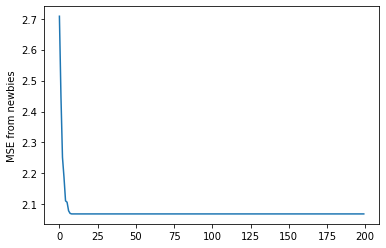

  0%|          | 0/200 [00:00<?, ?it/s]<ipython-input-9-9aaea3070c22>:18: RuntimeWarning: invalid value encountered in double_scalars
  res = licznik/(math.sqrt(m1) * math.sqrt(m2))
100%|██████████| 200/200 [11:20<00:00,  3.40s/it]


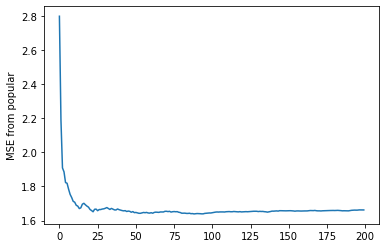

In [19]:
#paths = ['connoisseur.txt','newbies.txt','popular.txt','random.txt']
paths = ['newbies.txt','popular.txt']
for path in paths:
    res = []
    for k in tqdm(range(200)):
        tests = get_tests('../' + path)
        mse = tester(tests,k+1) 
        res.append(mse)
    path_wo_ext = path.split('.')[0]
    plt.plot(res)
    plt.ylabel(f'MSE from {path_wo_ext}')
    plt.show()
    with open(f'cb_genres_errors_{path_wo_ext}.txt','w') as f:
        for mse in res:
            f.write(str(mse) + '\n')



In [106]:
min(results)

1.6522564161859936